In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Capital Asset Pricing Model (CAPM)

Market_Portfolio.xlsx contains monthly nominal (net) returns for the market portfolio (expressed as percentages, but without "%"), over the ten-year period from Jan 2004 through Dec 2013. Assume that the (net) risk-free rate is 0.13% per month.

In [2]:
industry = pd.read_excel("Industry_Portfolios.xlsx")
market = pd.read_excel("Market_Portfolio.xlsx")
r_f = 0.13

Market Model

Estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolio using the market model: regress the monthly excess returns for each industry portfolio on the monthly excess returns for the market portfolio.

In [3]:
#combine two df together
df = pd.merge(market, industry, on = "Date")
df.head()

,Date,Market,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,200401,2.22,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
1,200402,1.46,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
2,200403,-1.23,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
3,200404,-1.75,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
4,200405,1.23,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86


In [4]:
#deg parameter represents the degree or order of the polynomial to fit [(Ri-Rf) = alpha + beta*(Rm-Rf)]
#x
excess_returns_market = df["Market"] - r_f
#y
excess_returns_industry = df["NoDur"] - r_f

cofficients = np.polyfit(excess_returns_market,excess_returns_industry,deg=1)
slope = cofficients[0]
intercept = cofficients[1]
print(f"alpha:{intercept}, beta:{slope}")

alpha:0.36944288006820153, beta:0.652647355963541


In [5]:
# #regress market and NoDur as an example (Ri-Rf) = alpha + beta*(Rm-Rf)

# #x
# excess_returns_market = df["Market"] - r_f
# #y
# excess_returns_industry = df["NoDur"] - r_f
# #regress
# market_data = sm.add_constant(excess_returns_market)
# model = sm.OLS(excess_returns_industry, market_data).fit()

# alpha = model.params['const']
# beta = model.params['Market']
# print(alpha, beta)

Create a table showing the intercept and slope coefficients for the ten industry portfolios.

In [6]:
#[(Ri-Rf) = alpha + beta*(Rm-Rf)]
results = pd.DataFrame(columns=['Industry', 'Alpha', 'Beta'])

for industry in df.iloc[:, 2:].columns:
    #x
    excess_returns_market = df["Market"] - r_f
    #y
    excess_returns_industry = df[industry] - r_f
    #regress
    cofficients = np.polyfit(excess_returns_market,excess_returns_industry,deg=1)
    beta = cofficients[0] #slope
    alpha = cofficients[1] #intercept
    
    new_row = pd.DataFrame({'Industry': [industry], 'Alpha': [alpha], 'Beta': [beta]})
    results = pd.concat([results, new_row], ignore_index = True, axis = 0)
results

,Industry,Alpha,Beta
0,NoDur,0.369443,0.652647
1,Durbl,-0.415599,1.648536
2,Manuf,0.159771,1.169846
3,Enrgy,0.501719,0.969850
4,HiTec,-0.064020,1.132969
5,Telcm,0.194691,0.900729
6,Shops,0.275492,0.826492
7,Hlth,0.237841,0.673036
8,Utils,0.444585,0.538086
9,Other,-0.387135,1.207309


In [7]:
# #[(Ri-Rf) = alpha + beta*(Rm-Rf)]
# results = pd.DataFrame(columns=['Industry', 'Alpha', 'Beta'])

# for industry in df.iloc[:, 2:].columns:
#     #x
#     excess_returns_market = df["Market"] - r_f
#     #y
#     excess_returns_industry = df[industry] - r_f
#     #regress
#     market_data = sm.add_constant(excess_returns_market)
#     model = sm.OLS(excess_returns_industry, market_data).fit()

#     alpha = model.params['const']
#     beta = model.params['Market']
#     new_row = pd.DataFrame({'Industry': [industry], 'Alpha': [alpha], 'Beta': [beta]})
#     results = pd.concat([results, new_row], ignore_index = True, axis = 0)
# results

Briefly explain the economic significance of the intercept and slope coefficients.

**Intercept coefficient from market model regression shows pricing error relative to CAPM.**

**Slope coefficient from market model regression shows degree of exposure to market risk.**

Security Market Line (SML)

Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio.

In [9]:
df

,Date,Market,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,200401,2.22,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
1,200402,1.46,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
2,200403,-1.23,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
3,200404,-1.75,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
4,200405,1.23,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...
115,201308,-2.69,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
116,201309,3.76,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
117,201310,4.17,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87
118,201311,3.12,1.29,1.81,2.95,0.85,3.65,0.27,3.67,4.54,-1.81,4.74


In [8]:
mean = pd.DataFrame({"mean":df.iloc[:,1:].mean()})
mean

,mean
Market,0.748083
NoDur,0.902833
Durbl,0.733333
Manuf,1.012833
Enrgy,1.231167
HiTec,0.766250
Telcm,0.881417
Shops,0.916333
Hlth,0.783833
Utils,0.907167


Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding β's. This will give you the intercept and slope coefficients for the SML. (Warning: the results may be very different from what you would expect!)

In [10]:
betas = results.copy()
betas.set_index("Industry", inplace = True)
betas = betas[["Beta"]]
betas

,Beta
Industry,
NoDur,0.652647
Durbl,1.648536
Manuf,1.169846
Enrgy,0.969850
HiTec,1.132969
Telcm,0.900729
Shops,0.826492
Hlth,0.673036
Utils,0.538086


In [11]:
regress = pd.merge(mean, betas, left_index=True, right_index = True, how = "outer")
regress["Beta"]["Market"] = 1
regress

,mean,Beta
Durbl,0.733333,1.648536
Enrgy,1.231167,0.969850
HiTec,0.766250,1.132969
Hlth,0.783833,0.673036
Manuf,1.012833,1.169846
Market,0.748083,1.000000
NoDur,0.902833,0.652647
Other,0.489083,1.207309
Shops,0.916333,0.826492
Telcm,0.881417,0.900729


In [12]:
#regress returns and beta
#R_p = R_f + (R_m - R_f)*beta_p

#regress
cofficients = np.polyfit(regress["Beta"], regress["mean"],deg=1)
R_f = cofficients[1]
risk_premium = cofficients[0]
print(f"The intercept({R_f}) and slope coefficients({risk_premium}) for the SML")

The intercept(1.032768368265706) and slope coefficients(-0.18546745836573267) for the SML


In [ ]:
# #regress returns and beta
# #R_p = R_f + (R_m - R_f)*beta_p

# #regress
# beta = sm.add_constant(regress["Beta"])
# model = sm.OLS(regress["mean"], beta).fit()

# R_f = model.params['const']
# risk_premium = model.params['Beta']
# print(f"The intercept({R_f}) and slope coefficients({risk_premium}) for the SML")

Use the estimated intercept and slope coefficients for the SML to plot the SML in the range of β from zero to two on the horizontal axis.

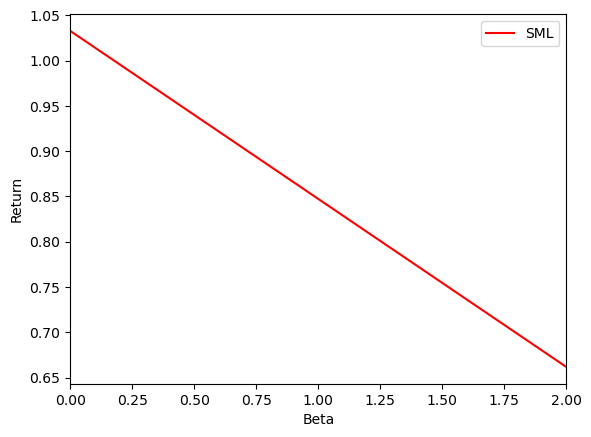

In [13]:
# intercept and slope
intercept = R_f
slope = risk_premium

# create data points
#beta from zero to two
x = np.linspace(0, 2, 100) 
plt.xlim(0,2)
y = intercept + slope * x  


plt.plot(x, y, color='red', label='SML')  

plt.xlabel('Beta')
plt.ylabel('Return')


plt.legend()

plt.show()

Also plot the positions of the ten industry portfolios and the market portfolio. (You are NOT required to label the individual portfolios.)

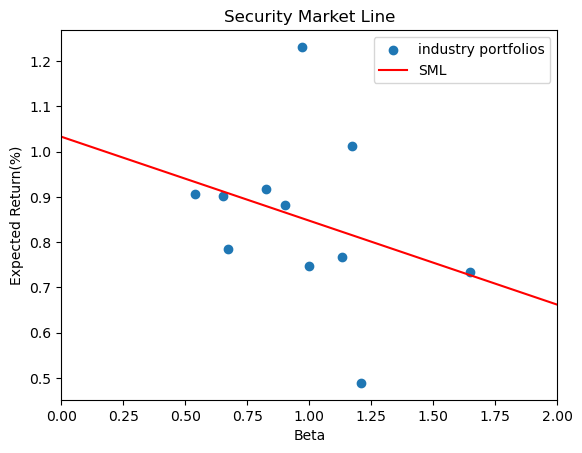

In [14]:
# intercept and slope
#R_p = R_f + (R_m - R_f)*beta_p
intercept = R_f
slope = risk_premium

# create data points
x = np.linspace(0, 2, 100)
plt.xlim(0,2)
y = intercept + slope * x  

plt.scatter(regress["Beta"], regress["mean"], label="industry portfolios")
plt.plot(x, y, color='red', label='SML')  

plt.xlabel('Beta')
plt.ylabel('Expected Return(%)')
plt.title("Security Market Line")

plt.legend()

plt.show()

Briefly explain the economic significance of the SML

**SML shows that all appropriately-priced assets have same Treynor ratio ⇒ assets that lie above SML are underpriced, while assets that lie below SML are overpriced.**